In [7]:
%load_ext autoreload
%autoreload 2
import numpy as np
import healpy as hp
import lusee
from lusee import grid2healpix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


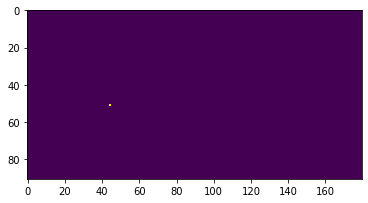

In [8]:
theta_deg = np.arange(91)*2
phi_deg = np.arange(180)*2
Ntheta = len(theta_deg)
Nphi = len(phi_deg)
theta = theta_deg/180*np.pi
phi = phi_deg/180*np.pi
img = np.zeros((Ntheta, Nphi))

img[51,44]=1.0
plt.imshow(img,interpolation='nearest')
Nside=128

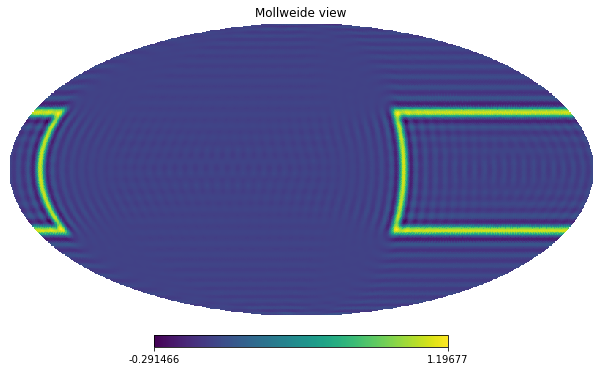

In [32]:
mp=grid2healpix(theta,phi,img,60,Nside,fast=False)
hp.mollview(mp)


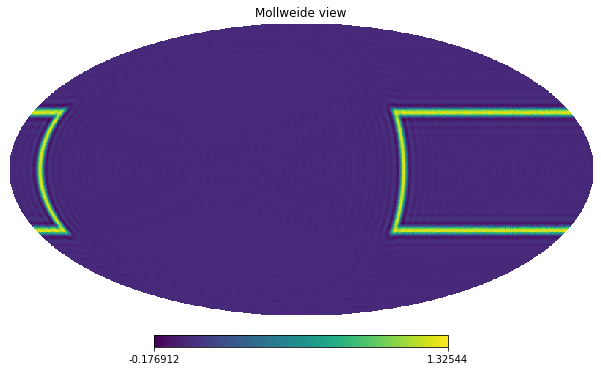

In [43]:
mp=grid2healpix(theta,phi,img,86,Nside,fast=True)
hp.mollview(mp)

In [12]:
hp.pixelfunc.pix2ang(Nside,mp.argmax())

(1.7806669190576343, 1.5401167110371836)

In [13]:
# do they match?
theta[51],phi[44]

(1.780235837034216, 1.53588974175501)

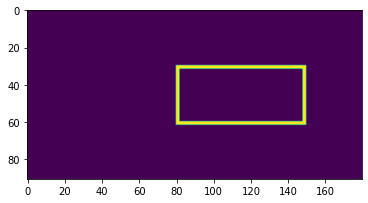

In [14]:
img*=0
## draw a rectangle
img [30:32,80:150]=1.0
img [60:62,80:150]=1.0
img [30:62,80:82]=1.0
img [30:62,148:150]=1.0
plt.imshow(img)


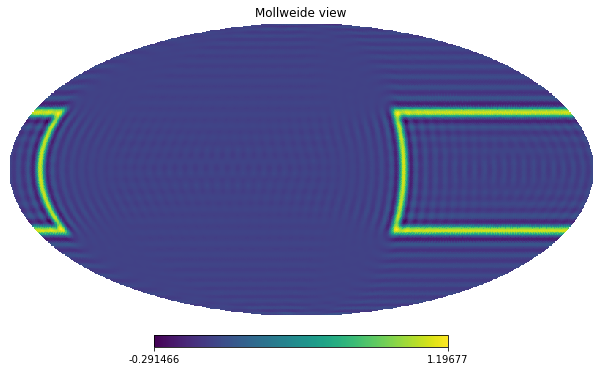

In [20]:
hp.mollview(grid2healpix(theta,phi,img,60,Nside,fast=True))

In [21]:
B = lusee.LBeam("../../AntennaSimResults/003_Freq1-50MHz_Delta1MHz_AntennaLength6m_AntennaAngle30deg_LanderHeight2m/RadiatedElectricField_AntennaLength6m_AntennaAngle30deg_LanderHeight2m_Phase+0deg.fits")

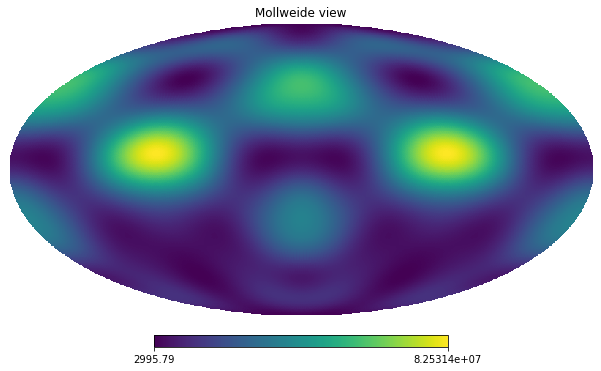

In [23]:
hp.mollview(B.power_hp(50,Nside,44))